# **Visualization Techniques**

In [ ]:
# To install (if needed)
#!pip install gensim
#!pip install numpy
#!pip install matplotlib
#!pip install scikit-learn
#!pip install nltk

## **Wordclouds**

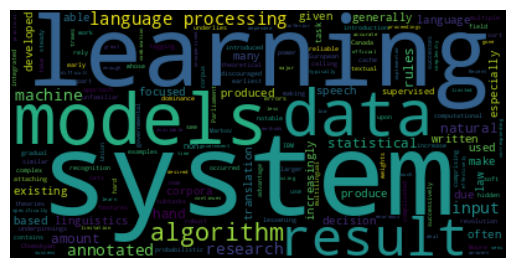

In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# read in nlptext.txt
with open("nlptext.txt", "r") as fn:
    text = fn.read()

# create a word cloud object
wordcloud = WordCloud().generate(text)

# display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


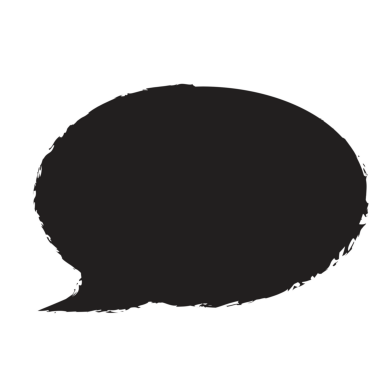

In [4]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

mask_image = np.array(Image.open("mask.png"))
plt.imshow(mask_image)
plt.axis("off")
plt.show()


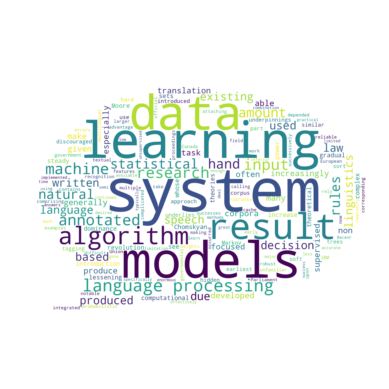

In [5]:
# create a word cloud object
wordcloud = WordCloud(background_color='white', mask=mask_image, stopwords = STOPWORDS).generate(text)

# display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## **t-SNE**

The goal of t-SNE is to map the high-dimensional data to a lower-dimensional space while preserving the structure of the data. t-SNE requires good amount of hyperparameter tuning to give effective results. Several important parameters are as follows.

**n_components**: The number of components, i.e., the dimension of the value space

**perplexity**: The number of effective neighbours

**n_iter**: Maximum number of iterations for the optimization.

**init**: Initialization of embedding.


In [6]:
import numpy as np
from gensim.models import Word2Vec, KeyedVectors #To load the model
import matplotlib.pyplot as plt #to generate the plot
from sklearn.manifold import TSNE #scikit learn's TSNE
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
# load model
model = KeyedVectors.load_word2vec_format('word2vec_cbow.bin', binary=True)

First, we can do a little bit of preprocessing to remove stop words to make it easier to visualize results.

In [9]:
# Preprocessing models vocabulary to make better visualizations
words_vocab= list(model.index_to_key) # all the words in the vocabulary.
print("Size of Vocabulary:",len(words_vocab))
print("Few words in Vocabulary",words_vocab[:30])

# Remove the stop words
stopwords_en = stopwords.words()
words_vocab_without_sw = [word.lower() for word in words_vocab if not word in stopwords_en]
print("Size of Vocabulary without stopwords:",len(words_vocab_without_sw))
print("Few words in Vocabulary without stopwords",words_vocab_without_sw[:30])

Size of Vocabulary: 161018
Few words in Vocabulary ['the', 'of', 'and', 'in', 'to', 'was', 'is', 'for', 'on', 'as', 'by', 'with', 'he', 'at', 'from', 'that', 'his', 'it', 'an', 'were', 'are', 'also', 'which', 'or', 'this', 'first', 'new', 'be', 'has', 'one']
Size of Vocabulary without stopwords: 159128
Few words in Vocabulary without stopwords ['school', 'references', 'time', 'year', 'bar', 'links', 'external', 'world', 'city', 'state', 'years', 'national', 'university', 'united', 'team', 'american', 'text', 'st', 'born', 'season', 'film', 'part', 'made', 'south', 'high', 'league', 'history', 'series', 'john', 'north']


With the increase in the amount of data, it becomes more and more difficult to visualize and interpret. In practice, similar words can be combined into groups for further visualization.

When performing t-SNE, try altering the values of the parameters to see how it changes the final visualization.

In [10]:
from sklearn.manifold import TSNE

keys = ['school', 'year', 'college', 'city', 'states', 'university', 'team', 'film']
embedding_clusters = []
word_clusters = []

for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings) # apending access vector of all similar words
    word_clusters.append(words) # appending list of all smiliar words

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape #geting the dimensions
tsne_model_en_2d = TSNE(perplexity=5, n_components=2, init='pca', n_iter=1500, random_state=2020)
# reshaping it into 2d
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)


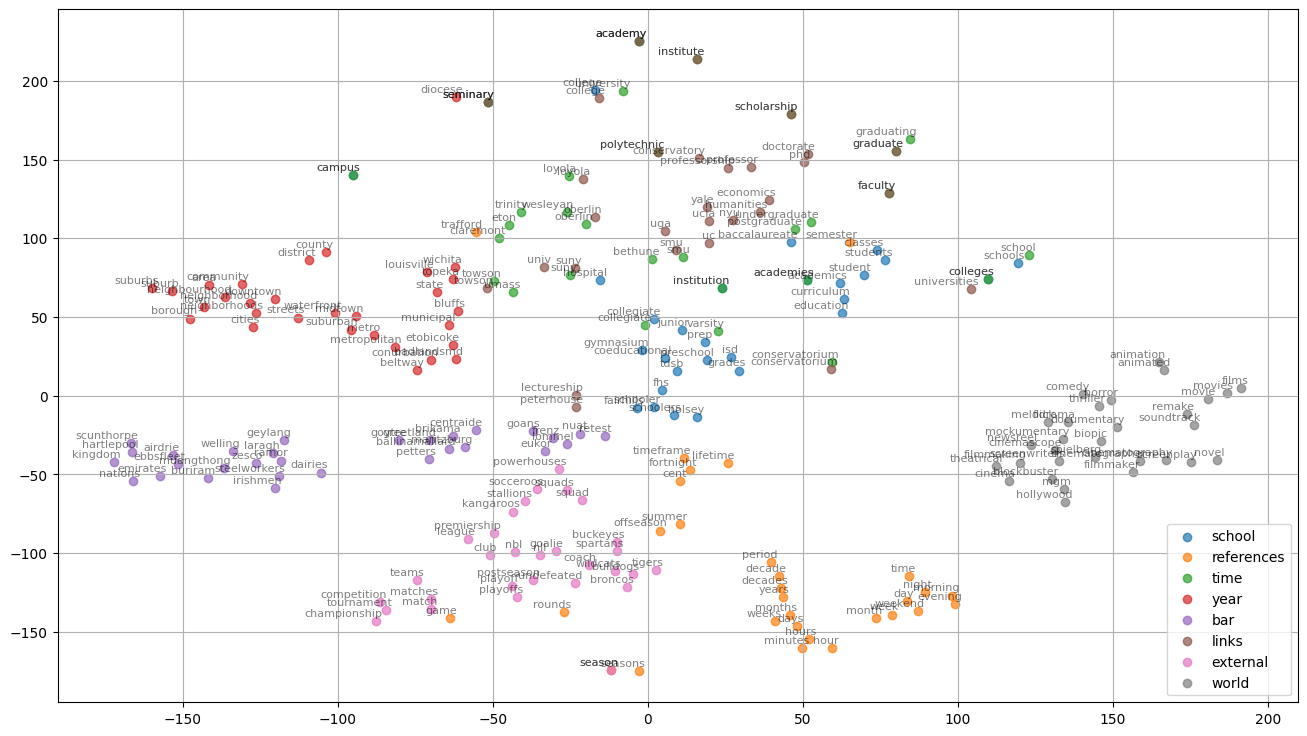

In [11]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline

#script for constructing two-dimensional graphics using Matplotlib
def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a=0.7):
    plt.figure(figsize=(16, 9))
    for label, embeddings, words in zip(labels, embedding_clusters, word_clusters):
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.grid(True)
    plt.show()

tsne_plot_similar_words(words_vocab_without_sw, embeddings_en_2d, word_clusters)

## **Heatmaps**



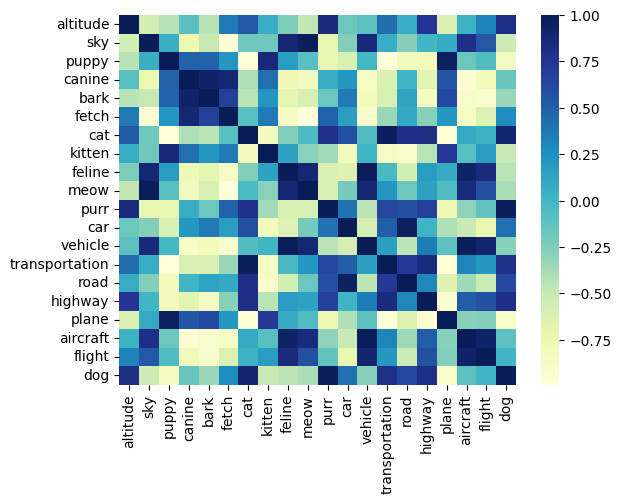

In [16]:
import gensim
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# train a word2vec model
corpus = [["dog", "puppy", "canine", "bark", "fetch"],
    ["cat", "kitten", "feline", "meow", "purr"],
    ["car", "vehicle", "transportation", "road", "highway"],
    ["plane", "aircraft", "flight", "sky", "altitude"]]

model = Word2Vec(corpus, vector_size=3, window=3, min_count=1)

word_vectors = model.wv

# get the cosine similarity matrix
similarity_matrix = cosine_similarity(word_vectors.vectors)

# create a heatmap using seaborn library
sns.heatmap(similarity_matrix, xticklabels=word_vectors.index_to_key, yticklabels=word_vectors.index_to_key, cmap='YlGnBu')
plt.show()

## **Extra: Using Scattertext**

In [17]:
!pip install scattertext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 17.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9296 sha256=12457c80b8072a1050dc08464de02108ff3f5c581adaeed73ceacb4a00679f26
  Stored in directory: /root/.cache/pip/wheels/bc/be/39/c37ad168eb2ff644c9685f52554440372129450f0b8ed203dd
Successfully built flashtext


In [19]:
import pandas as pd
import scattertext as st
import nltk
from nltk.corpus import movie_reviews

# Download the movie_reviews dataset from NLTK
nltk.download('movie_reviews')

# Load the movie_reviews dataset
positive_reviews = []
for fileid in movie_reviews.fileids('pos'):
    words = movie_reviews.words(fileid)
    positive_reviews.append(' '.join(words))

negative_reviews = []
for fileid in movie_reviews.fileids('neg'):
    words = movie_reviews.words(fileid)
    negative_reviews.append(' '.join(words))

# Create a DataFrame
df = pd.DataFrame({
    'text': positive_reviews + negative_reviews,
    'category': ['Positive'] * len(positive_reviews) + ['Negative'] * len(negative_reviews)
})

# Create a Corpus
corpus = st.CorpusFromPandas(df, category_col='category', text_col='text').build()

# Create a Scattertext plot
html = st.produce_scattertext_explorer(
    corpus,
    category='Positive',
    category_name='Positive',
    not_category_name='Negative',
    width_in_pixels=1000,
    metadata=df['category']
)


[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


Scattertext plot saved to: scattertext_movie_reviews.html
